# 31-August-2022

In [4]:
from IPython.display import Image, HTML, display
import numpy as np
import matplotlib.pyplot as plt

# A few Questions
1. When I calculate eigenvalues of the $\tilde{A}$ I get polar coordinate form for eigenvalues, although I don't specify any extra options. And whats the difference between these and the square form? The square form should be on the left side of the axis, while the polar form should have a radius smaller than 1. They have a relation of $\exp^\lambda$ vs $\lambda^x$.
- What's the meaning of negative eigenvalues in this case (the polar form)?

2. In DMD, they use these polar form of eigenvalues. Which they call continous-time eigenvalues.

<hr style="border:1px solid gray">

I looked at the eigenvalues of the **Full-Rank** and **Low-Rank** snapshots matrix:
- For low-rank approximations (such as 4 and 5) we cannot closely relate the eigenvalues of the full matrix to the low-rank matrix. But as we increase the number of ranks in the low-rank approximation, the beginning eigenvalues start to match.
- But what we are after is to not use high rank SVD approximations, as it reduces the code efficiency. (increases the eigendecomposition problem size, increased number of snapshtos required, and even eliminating too many modes might not be better than eliminating only a few (it loses effectiveness after including a certain number of modes))

I also looked at the condition number of $\tilde{A}$ and $I - \tilde{A}$:
- $\tilde{A}$ was mostly well-conditioned and had a value of approximately 1. Its condition number increased as we included more modes, and increased the size of the matrix.
- $I - \tilde{A}$ was had condition numbers mostly higher than 2, and reached to values such as 200 as we increased the number of snapshots and included more modes. But the updates became better as we added more modes, So this doesn't act as a good measure.

## Snpashots data
- With increasing number of data, we should increase the number of modes we are eliminating, to keep up the update's effectiveness.
- By increasing the number of snapshots, we increase the condition number of our data matrix.

## Different iterations
- After some iteration that our solution is developed(approximately after we have a constant slope for residual history) the drop in the residual remains approximately the same. [which is against the case for linear problems where we got a bigger update as we converged further in the solution]

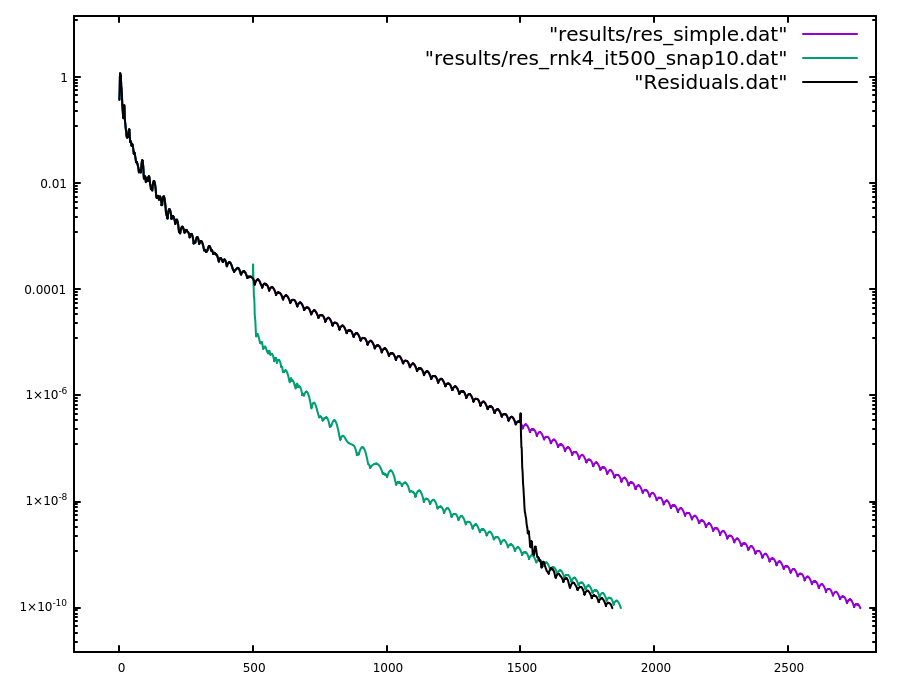

In [8]:
Image(filename='./dmd_it1500_snap60.png', width = 700)

Similar and not similar can be a good way to describe this.


In [6]:
display(HTML("<table><tr><td><img src='Navier-sigmaratios-2ndto1st-50snaps.png'></td><td><img src='Poisson-sigmaratios-2ndto1st.png'></td></tr></table>"))

,


Low ratios indicate disimilar modes, higher ratios indicate similarity between modes.\
In both plots we have a dominant pattern, and at some place the pattern changes.

- For Navier--Stokes, in modes 8 and 14 the pattern changes, which tells us that a real-valued mode became dominant.
- For Poisson, after mode 5 the pattern changes, telling us that the similarity between modes is increasing. Hence, there is no need to add more modes in our solution update.

- The plot above shows the sigma ratios ($\frac{\sigma2}{ \sigma1}$)
- Normally these oscillate with a similar pattern. They go up and down. But at points such as 7 and 14 the pattern changes, and instead of going up again the sigma ratios decrease for another time. This gives us a signal to know that we need to change the pattern of number of mode elimination, from odd to even or vice versa.

- in the case above, at first we were dealing with conjugate pairs of eigenvalues (the dominant modes were were related to complex eigenvalues), but if we want to eliminate more than 6 modes, we should deal with a real-valued mode. So after 7, we should also consider eliminating a real-valued mode, meaning that the number of modes we are eliminating is now odd and not even.

- This change in pattern happens once again in 14, where we get another real-valued mode, so we should eliminate even number of modes (2 real-valued modes, other conjugate pairs == EVEN NUMBER)

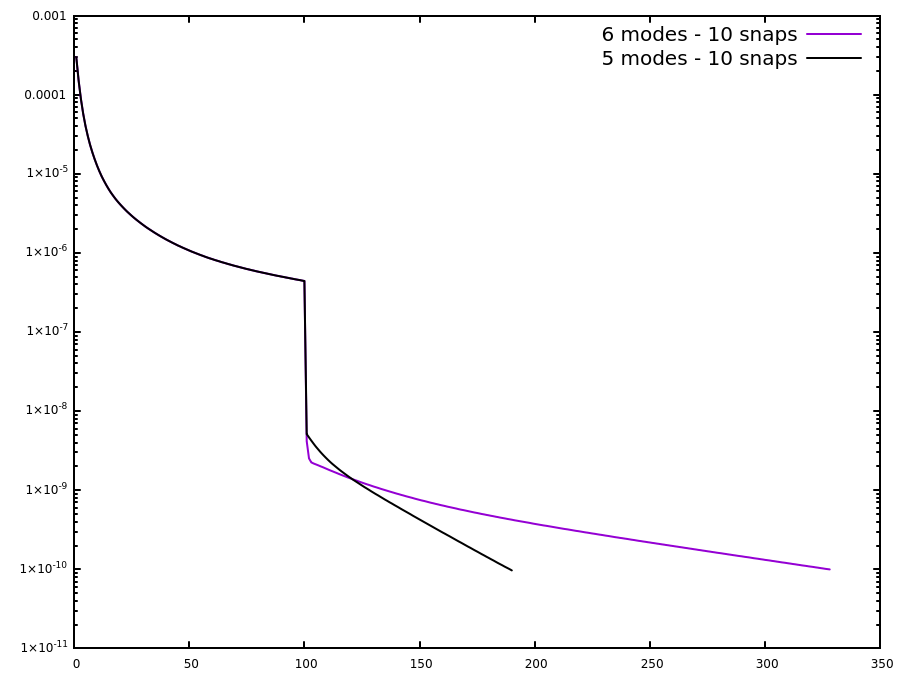

In [7]:
Image(filename='resplot_6vs5modes.png', width = 600)

## The issue with the negative eigenvalues of $\tilde{A}$
- $\tilde{A}$ might have negative eigenvalues, and in DMD we use the log of eigenvalues of $\tilde{A}$ to calculate the modes. If we have pure real eigenvalues that are negative, we get NAN for omega (the variable we use in our model), but if we have negative complex eigenvalue log of that value exists and the result would be OK.